In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


In [14]:
# fetch model params

icr_symmetric_params = np.load('../eval/training_results/marmotte/icr_symmetrical/grand_salon_a/train_full_all_horizons.npy')
icr_asymmetric_params = np.load('../eval/training_results/marmotte/icr_asymmetrical/grand_salon_a/train_full_all_horizons.npy')
enhanced_kinematic_params = np.load('../eval/training_results/marmotte/enhanced_kinematic/grand_salon_a/train_full_all_horizons.npy')

print(icr_symmetric_params)
print(icr_asymmetric_params)
print(enhanced_kinematic_params)

[0.88132674 0.25476058]
[ 0.86301886  0.9109506   0.00417836  0.22434593 -0.28777154]
[ 0.13877995  5.          0.37087247 -0.08675673 -0.02581009  4.99909815]


In [15]:
ideal_diff_drive_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/grand_salon_b/ideal_diff_drive_full_eval_metrics.pkl')
icr_symmetric_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/grand_salon_b/icr_symmetrical_full_eval_metrics.pkl')
icr_asymmetric_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/grand_salon_b/icr_asymmetrical_full_eval_metrics.pkl')
enhanced_kinematic_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/grand_salon_b/enhanced_kinematic_full_eval_metrics.pkl')

print(enhanced_kinematic_errors_dataframe)

    prediction_error_x prediction_error_y prediction_error_z  \
0             0.006661           0.000976            0.00207   
1            -0.002452           0.000404          -0.001158   
2             0.000298          -0.001692           0.000153   
3             0.000755           0.000415            0.00023   
4            -0.000405           0.000081          -0.000271   
..                 ...                ...                ...   
734          -2.203534          -0.701447           0.024049   
735          -0.010473           0.011687           0.004946   
736           0.000407           -0.00038          -0.001117   
737          -0.000381           0.000952           0.000607   
738           0.001318          -0.000057            0.00016   

    prediction_error_roll prediction_error_pitch prediction_error_yaw  \
0               -0.001643               0.006583             3.033976   
1                0.000193               -0.00022            -0.000151   
2           

In [16]:
# fetch some stats

ideal_diff_drive_total_trans_error = ideal_diff_drive_errors_dataframe['prediction_error_3dof_trans'].sum()
ideal_diff_drive_total_ang_error = ideal_diff_drive_errors_dataframe['prediction_error_3dof_ang'].sum()
print('IDD total trans error [m] : ', ideal_diff_drive_total_trans_error)
print('IDD total ang error [rad] : ', ideal_diff_drive_total_ang_error)

icr_symmetric_total_trans_error = icr_symmetric_errors_dataframe['prediction_error_3dof_trans'].sum()
icr_symmetric_total_ang_error = icr_symmetric_errors_dataframe['prediction_error_3dof_ang'].sum()
print('ICR S total trans error [m] : ', icr_symmetric_total_trans_error)
print('ICR S total ang error [rad] : ', icr_symmetric_total_ang_error)

icr_asymmetric_total_trans_error = icr_asymmetric_errors_dataframe['prediction_error_3dof_trans'].sum()
icr_asymmetric_total_ang_error = icr_asymmetric_errors_dataframe['prediction_error_3dof_ang'].sum()
print('ICR AS total trans error [m] : ', icr_asymmetric_total_trans_error)
print('ICR AS total ang error [rad] : ', icr_asymmetric_total_ang_error)

enhanced_kinematic_total_trans_error = enhanced_kinematic_errors_dataframe['prediction_error_3dof_trans'].sum()
enhanced_kinematic_total_ang_error = enhanced_kinematic_errors_dataframe['prediction_error_3dof_ang'].sum()
print('EK total trans error [m] : ', enhanced_kinematic_total_trans_error)
print('EK AS total ang error [rad] : ', enhanced_kinematic_total_ang_error)

IDD total trans error [m] :  273.59531833547607
IDD total ang error [rad] :  399.3854601899266
ICR S total trans error [m] :  118.21742625274095
ICR S total ang error [rad] :  171.29036945890712
ICR AS total trans error [m] :  114.89540248437564
ICR AS total ang error [rad] :  178.35717813941045
EK total trans error [m] :  272.821932282887
EK AS total ang error [rad] :  394.0159194671264


Text(0, 0.5, 'Angular error [rad]')

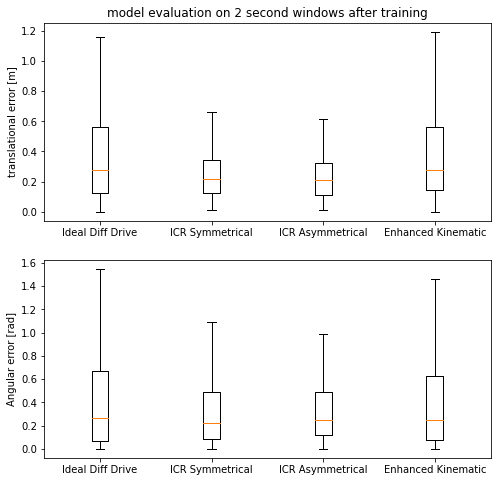

In [17]:
fig1, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].boxplot(ideal_diff_drive_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[0], labels=['Ideal Diff Drive'])
axs[0].boxplot(icr_symmetric_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[1], labels=['ICR Symmetrical'])
axs[0].boxplot(icr_asymmetric_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[2], labels=['ICR Asymmetrical'])
axs[0].boxplot(enhanced_kinematic_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[3], labels=['Enhanced Kinematic'])
axs[0].set_title('model evaluation on 2 second windows after training')
axs[0].set_ylabel('translational error [m]')

axs[1].boxplot(ideal_diff_drive_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[0], labels=['Ideal Diff Drive'])
axs[1].boxplot(icr_symmetric_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[1], labels=['ICR Symmetrical'])
axs[1].boxplot(icr_asymmetric_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[2], labels=['ICR Asymmetrical'])
axs[1].boxplot(enhanced_kinematic_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[3], labels=['Enhanced Kinematic'])
axs[1].set_ylabel('Angular error [rad]')

(array([75., 86., 83., 87., 62., 60., 46., 23., 27., 95., 34.,  4.,  7.,
        10.,  4.,  9.,  4.,  2.,  2.,  1.,  0.,  3.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.]),
 array([0.00023152071944688226, 0.06091359631140111, 0.12159567190335532,
        0.18227774749530956, 0.24295982308726377, 0.303641898679218,
        0.36432397427117225, 0.42500604986312646, 0.48568812545508067,
        0.5463702010470349, 0.6070522766389891, 0.6677343522309434,
        0.7284164278228976, 0.7890985034148518, 0.849780579006806,
        0.9104626545987602, 0.9711447301907145, 1.0318268057826687,
        1.092508881374623, 1.1531909569665773, 1.2138730325585314,
        1.2745551081504858, 1.33523718374244, 1.395919259334394,
        1.4566013349263485, 1.5172834105183026, 1.5779654861102568,
        1.638647561702211, 1.6993296372941653, 1.7600117128861195,
        1.8206937884780736, 1.88

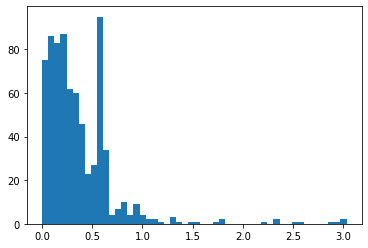

In [18]:
# plot model error histogram

plt.hist(enhanced_kinematic_errors_dataframe['prediction_error_3dof_trans'].to_numpy(), 50)
# plt.hist(enhanced_kinematic_errors_dataframe['prediction_error_3dof_ang'], 50)